# Gyroscope DDPG reward function testing (spinup library)

In [1]:
import gym
from gym import spaces
from gym.utils import seeding
import numpy as np
from os import path
from scipy.integrate import solve_ivp
import pandas as pd

import gym_gyroscope_env
import spinup
import torch
from functools import partial

from custom_functions.custom_functions import env_fn 
from custom_functions.custom_functions import create_env
from custom_functions.custom_functions import load_agent
from custom_functions.custom_functions import test_agent
from custom_functions.custom_functions import plot_test
from custom_functions.custom_functions import evaluate_control

import random
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In /home/xiongyan/anaconda3/envs/spinningup/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/xiongyan/anaconda3/envs/spinningup/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/xiongyan/anaconda3/envs/spinningup/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/xiongyan/anaconda3/envs/spinningup/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor rele

## Plot rewards

In [2]:
def read_progress(agent_path):
    
    # count lines
    file = open(agent_path+"/progress.txt", "r")
    count = len(file.readlines())
    data = np.empty([count-1, 19])
    file.seek(0)
    
    # read each line as a numpy array
    for row, x in enumerate(file):
        if row == 0:
            continue
        data[row-1] = np.array(x.split('\t')).astype(np.float)
    file.close()
    
    return data

iter0_base 2000
iter0_reward01 2000
iter0_reward02 2000
iter0_reward03 2000
iter0_rs01 2000
iter0_rs02 2000
iter0_gamma01 2000
iter0_gamma02 2000
iter0_gamma03 2000
iter0_polyak01 2000
iter0_polyak02 2000
iter0_polyak03 2000
iter0_lr01 2000
iter0_lr02 2000
iter0_bs01 2000
iter0_bs02 2000
iter0_ss01 2000
iter0_ss02 2000
iter0_noise01 2000
iter0_noise02 2000


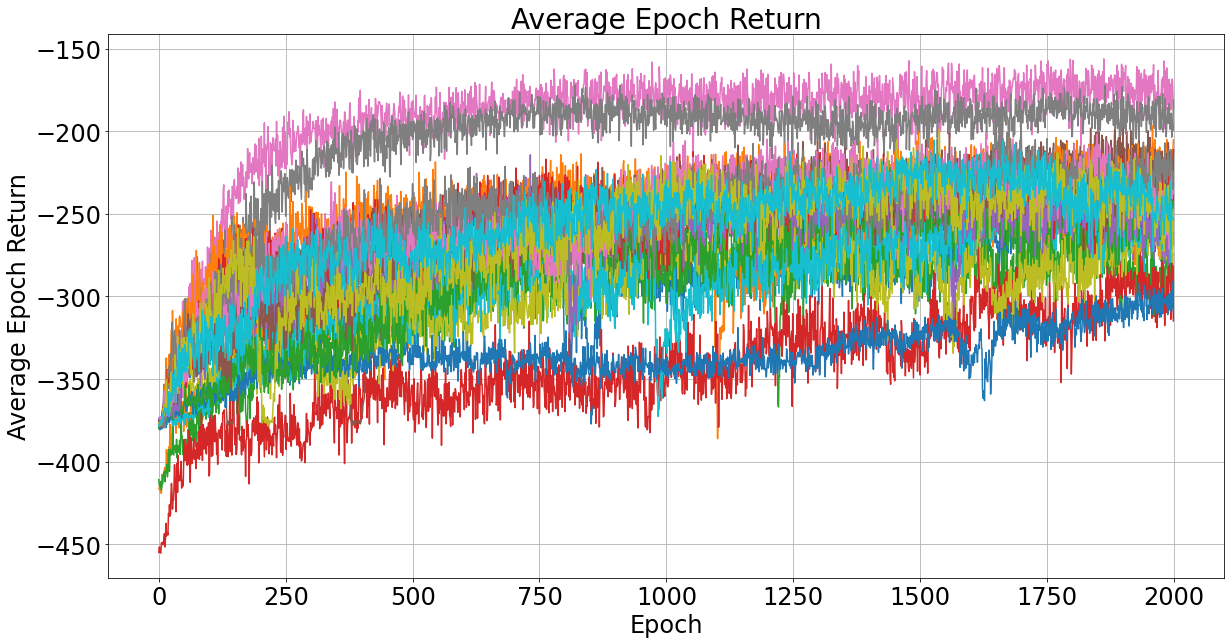

In [3]:
plt.figure(figsize=(20,10))
plt.title('Average Epoch Return',fontsize=28)
plt.xlabel('Epoch',fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel('Average Epoch Return',fontsize=24)
plt.yticks(fontsize=24)
plt.grid()

agent_paths = ['iter0_base','iter0_reward01','iter0_reward02','iter0_reward03',
              'iter0_rs01','iter0_rs02','iter0_gamma01','iter0_gamma02','iter0_gamma03',
              'iter0_polyak01','iter0_polyak02','iter0_polyak03','iter0_lr01','iter0_lr02',
              'iter0_bs01','iter0_bs02','iter0_ss01','iter0_ss02','iter0_noise01','iter0_noise02']

for agent_path in agent_paths:
    progress = read_progress(agent_path)
    print(agent_path, len(progress))
    plt.plot(np.arange(progress.shape[0]), progress[:,1])
#     plt.fill_between(np.arange(progress.shape[0]), progress[:,3], progress[:,4], alpha=0.5)
#     plt.fill_between(np.arange(progress.shape[0]), progress[:,1]+progress[:,2], progress[:,1]-progress[:,2], alpha=0.5)

# plt.xlim([0,500])
# plt.ylim([-2000,0])
# plt.legend(agent_paths,fontsize=24)

## Test an agent

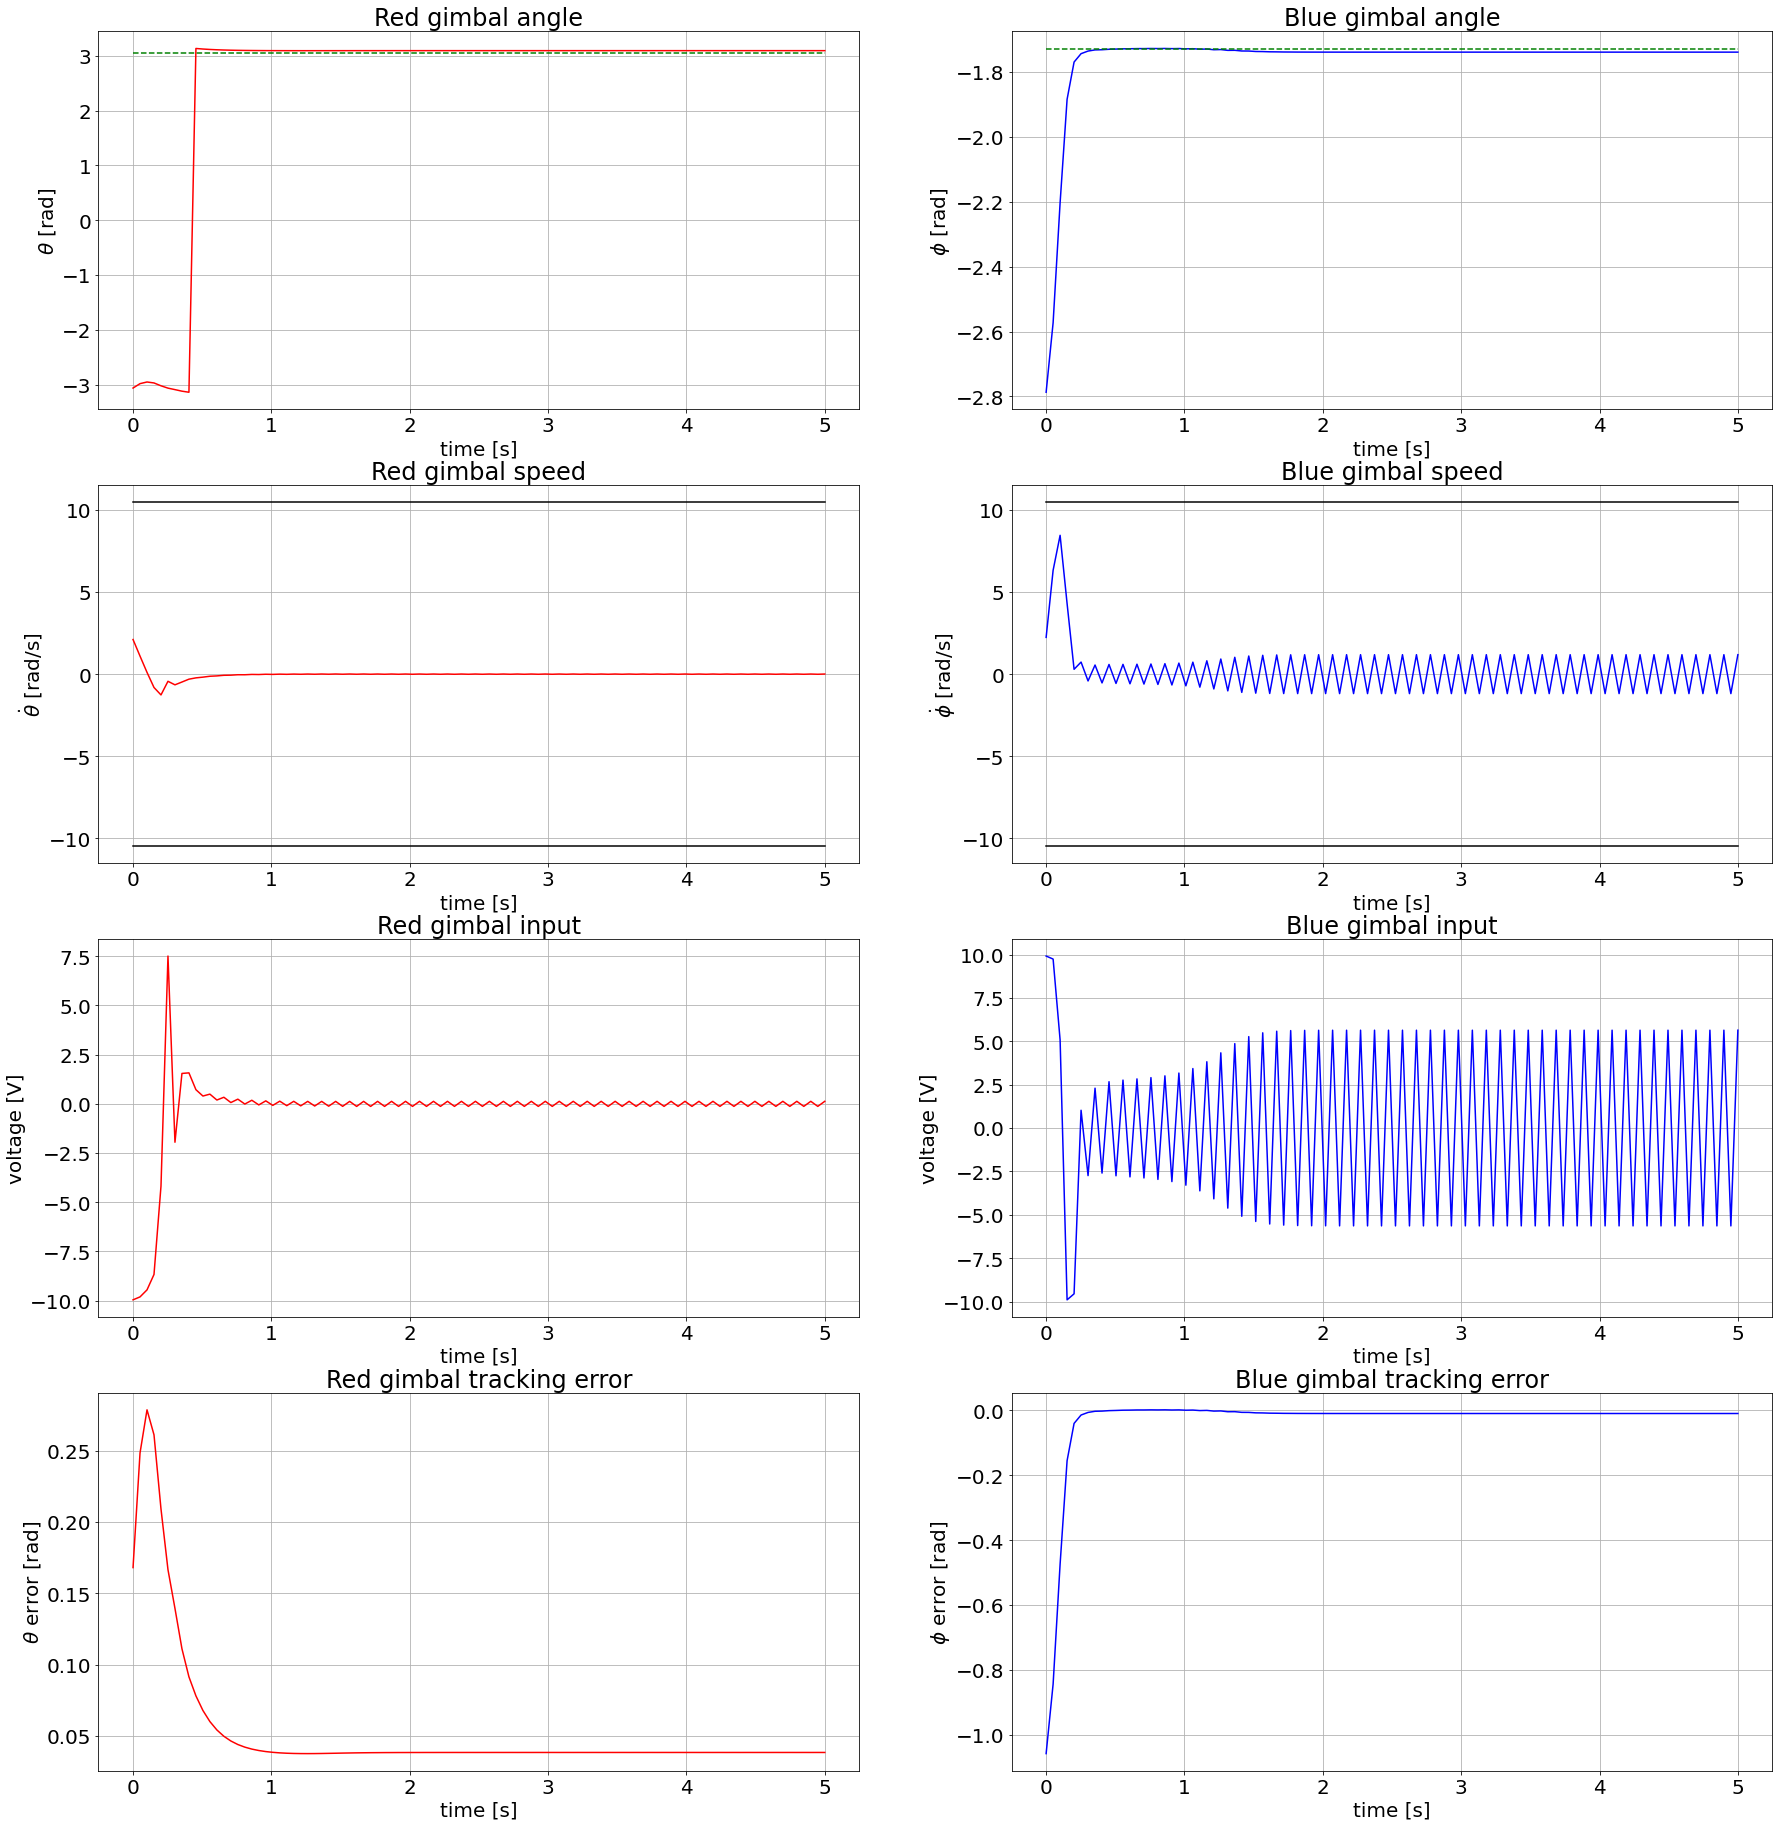

In [13]:
# Test paramaters
env_name = 'GyroscopeEnv-v1'

# init_state = np.array([0,0,0,0,200/60*2*np.pi,45/180*np.pi,-60/180*np.pi])
env = create_env(env_name,state=None)

agent_paths = ['iter0_base','iter0_reward01','iter0_reward02','iter0_reward03',
              'iter0_rs01','iter0_rs02','iter0_gamma01','iter0_gamma02','iter0_gamma03',
              'iter0_polyak01','iter0_polyak02','iter0_polyak03','iter0_lr01','iter0_lr02',
              'iter0_bs01','iter0_bs02','iter0_ss01','iter0_ss02','iter0_noise01','iter0_noise02']

agent = load_agent(agent_paths[5])
t_end = 5

score, state_record, obs_record, action_record, reward_record = test_agent(env,agent,t_end)
plot_test(state_record, action_record, t_end, 4)

## Evaluate control performance

In [5]:
iter0_metrics = pd.read_csv('iter0_metrics.csv')
pd.set_option('display.max_columns', None)
iter0_metrics

,Unnamed: 0,iter0_base,iter0_reward01,iter0_reward02,iter0_reward03,iter0_rs01,iter0_rs02,iter0_gamma01,iter0_gamma02,iter0_gamma03,iter0_polyak01,iter0_polyak02,iter0_polyak03,iter0_lr01,iter0_lr02,iter0_bs01,iter0_bs02,iter0_ss01,iter0_ss02,iter0_noise01,iter0_noise02
0,$\theta$ MAE (rad),0.1547,0.1735,0.1724,0.1455,0.1569,0.1305,0.2586,0.0958,0.2773,0.1665,0.1522,0.1281,0.2025,0.1483,0.1758,0.1441,0.1513,0.1370,0.1849,0.1681
1,$\phi$ MAE (rad),0.1136,0.1307,0.1252,0.1236,0.1650,0.1014,0.0467,0.0793,0.1858,0.1604,1.5709,0.0861,0.1279,0.1184,0.2376,0.1084,0.1079,0.1016,0.1366,0.1195
2,$\theta$ MSSE (rad),0.0604,0.0834,0.0923,0.0525,0.0524,0.0419,0.1330,0.0238,0.1872,0.0759,0.0509,0.0403,0.1039,0.0525,0.0838,0.0515,0.0606,0.0495,0.0889,0.0805
3,$\phi$ MSSE (rad),0.0380,0.0561,0.0525,0.0441,0.0905,0.0365,0.0063,0.0179,0.0840,0.0728,NaN,0.0235,0.0464,0.0488,0.1211,0.0425,0.0451,0.0352,0.0609,0.0575
4,$\theta$ in bounds (%),91.2700,89.9400,90.9100,96.4700,88.5800,95.5400,94.2200,99.7500,68.7500,83.6600,14.2700,99.1100,84.9300,90.7800,88.2800,93.6500,94.2900,97.8400,81.6200,93.4700
5,$\phi$ in bounds (%),94.2600,92.6700,88.3500,97.9100,81.5100,95.3300,99.8100,99.5900,83.4200,80.0000,0.0000,97.9400,93.9100,89.3500,72.2800,91.8600,96.7700,95.2700,84.2800,90.1000
6,$\theta$ unsteady (%),4.6000,1.6600,5.3900,0.4800,10.1200,3.5900,0.8900,0.1400,5.0500,14.8000,85.6800,0.1200,5.2500,6.4400,5.5200,3.4900,2.5000,0.3500,15.1700,3.4400
7,$\phi$ unsteady (%),5.0900,6.0900,10.4000,1.4900,14.9800,4.2800,0.1800,0.2100,12.7900,16.8600,100.0000,2.0100,4.8400,9.8300,16.4400,7.7400,3.1400,4.5800,14.0100,9.1400
8,$\theta$ rise time (s),0.5040,0.5057,0.4733,0.5821,0.5218,0.5288,0.5997,0.4512,0.6206,0.4994,0.4056,0.4919,0.4911,0.5038,0.4688,0.5162,0.5250,0.4938,0.5107,0.5939
9,$\phi$ rise time (s),0.3612,0.3327,0.3335,0.3433,0.3513,0.3614,0.2481,0.3228,0.3206,0.3507,NaN,0.3257,0.3554,0.3459,0.3566,0.3323,0.3292,0.3399,0.3442,0.3514
